# Exploring ML Fairness Concepts on the Titanic Dataset

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib notebook

In [2]:
titanic_df = sns.load_dataset('titanic')

In [3]:
import pandas_profiling
titanic_df.profile_report()

Features: 14
Train/test size: (712, 179)
Evaluating with threshold: 0.5
AUC: 0.869
TN: 99 FP: 10
FN: 26 TP: 44


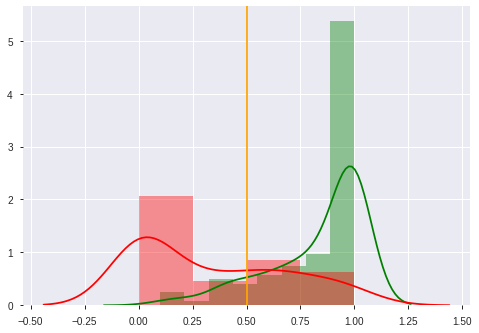

In [4]:
from titanic_pipeline import preprocess_data, create_classifier, evaluate_model

X_train, X_test, y_train, y_test = preprocess_data(titanic_df)

clf = create_classifier()
clf.fit(X_train, y_train)
evaluate_model(X_test, y_test, clf)

## Evaluating Male Population

Evaluating with threshold: 0.5
AUC: 0.758
TN: 85 FP: 4
FN: 19 TP: 5


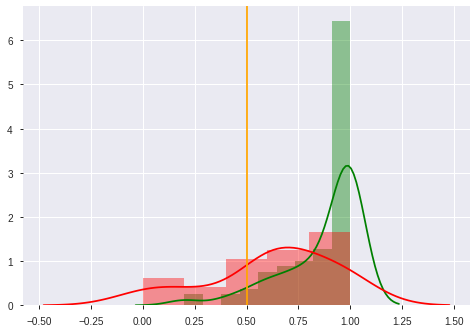

In [5]:
male_ind = X_test["sex"] == "male"
evaluate_model(X_test.loc[male_ind], y_test[male_ind], clf)

## Evaluating Female Population

Evaluating with threshold: 0.5
AUC: 0.890
TN: 14 FP: 6
FN: 7 TP: 39


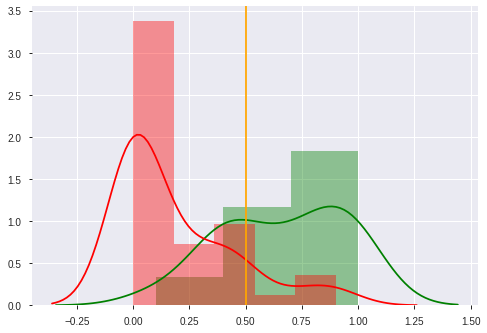

In [6]:
evaluate_model(X_test.loc[~male_ind], y_test[~male_ind], clf)

# Observational Metrics

Here we want to look at the observational fairness metrics, namely

### Equalised Odds

For all $a, a'$ and all $y$ we have 
$$P(\hat{Y} = y | A = a, Y = y) = P(\hat{Y} = y | A = a', Y = y)$$

> Translation: TP rates and TN rates are both equal over sensitive groups

### Calibration

For all $y$ and $a, a'$ we have
$$P(Y = y | A = a, \hat{Y} = y) = P(Y = y | A = a', \hat{Y} = y)$$

> We want the accuracy of the prediction (both positive/negative) to be equal over sensitive groups

### Demographic Parity/Disparate Impact

For all $y, a, a'$ we have
$$ P(\hat{Y} = y | A = a) = P(\hat{Y} = y | A = a')$$

> We want the distribution of predicted outcomes to be equal over sensitive groups

### Individual Fairness
We'll skip this due to difficulty choosing a proper metric for judging the similarity of two individuals.

> We want similar individuals from different groups to be treated equally.


In [7]:
from fairness_metrics import eqaualised_odds, calibration, demographic_parity
        
eqaualised_odds(X_test, y_test, clf, "sex")
# TODO: Plot graph for different thresholds

TP rate for male: 0.21
TN rate for male: 0.96
TP rate for female: 0.85
TN rate for female: 0.70


In [8]:
calibration(X_test, y_test, clf, "sex")

# POSITIVE OUTCOME
Fraction of male that were predicted as 1 that are actually 1: 0.56
Fraction of female that were predicted as 1 that are actually 1: 0.87

# NEGATIVE OUTCOME
Fraction of male that were predicted as 0 that are actually 0: 0.82
Fraction of female that were predicted as 0 that are actually 0: 0.67


In [9]:
demographic_parity(X_test, clf, "sex")

Fraction of male that were predicted 1: 0.08
Fraction of female that were predicted 1: 0.68
